In [1]:
import numpy as np
import matplotlib.pyplot as plt

## $- u''+ 9u-\ln(1 + x^2)\cos(u)= -1$

## $u(0) = u(1) = 0$

In [9]:
def Phi_function(c, N, h):
    
    sum_1 = c[1:-1] ** 2 - c[1:-1] * (c[:-2] + c[2:])
    sum_2 = 1/3 * c[1:-1] ** 2 + 1/6 * c[1:-1] * (c[:-2] + c[2:])
    sum_3 = np.log(1 + (np.arange(1, N + 1))**2) * np.cos(c[1:-1])
    sum_4 = c[1:-1]
                                                    
    return 1/h * np.sum(sum_1) + 9 * h * np.sum(sum_2) - h * np.sum(sum_3) + h * np.sum(sum_4)

In [10]:
def grad_Phi(ck, N, h):
    
    grad = np.array(0)
    j = np.arange(1, N + 1)
    
    grad = np.append(grad, 2 * ck[j] - ck[j - 1] - ck[j + 1] + 9 * h**2 * (2/3 * ck[j] + 1/6 * ck[j - 1] + 1/6 * ck[j + 1]) - h**2 * np.log(1 + (j * h)**2) * np.cos(ck[j]) + 1/2 * h**2)
    grad = np.append(grad, 0)
    
    return grad

In [11]:
def c_0(N, h):
    
    c_0 = np.array(0)
    j = np.arange(1, N + 1)
    c_0 = np.append(c_0, 1/9 - (np.exp(3 * j * h) + np.exp(3 - 3 * j * h)) / (9 * (1 + np.exp(3))))
    c_0 = np.append(c_0, 0)
    
    return c_0

In [12]:
def gradient_descent(N, h, epsilon):
    
    w = 1
    ck = c_0(N, h)
    ck1 = ck - w * grad_Phi(ck, N, h)
    
    while Phi_function(ck1, N, h) >= Phi_function(ck, N, h) and abs(abs(Phi_function(ck, N, h)) - abs(Phi_function(ck1, N, h))) >= epsilon:
        
        w = w / 2
        ck1 = ck - w * grad_Phi(ck, N, h)
        
    while abs(abs(Phi_function(ck, N, h)) - abs(Phi_function(ck1, N, h))) >= epsilon:
        
        w = 1
        ck = ck1
        ck1 = ck - w * grad_Phi(ck, N, h)
        
        while Phi_function(ck1, N, h) >= Phi_function(ck, N, h) and abs(abs(Phi_function(ck, N, h)) - abs(Phi_function(ck1, N, h))) >= epsilon:
            
            w = w / 2
            ck1 = ck - w * grad_Phi(ck, N, h)
            
    print(f'Пусть N = {N}:')
    print(f'Epsilon = {epsilon}')
    print('Коэффциент релаксации к моменту решения задачи минимизации =', w)
    
    return ck1

Пусть N = 9:
Epsilon = 1e-11
Коэффциент релаксации к моменту решения задачи минимизации = 1.1641532182693481e-10


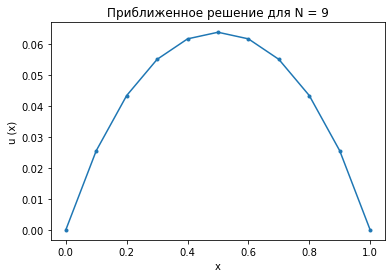

In [13]:
N = 9
x = np.linspace(0, 1, N + 2) 
h = 1 / (N + 1)
epsilon = 1e-11
u = gradient_descent(N, h, epsilon)

plt.plot(x, u, marker='.')
plt.xlabel('x')
plt.ylabel('u (x)')
plt.title(f'Приближенное решение для N = {N}')
plt.show()

Пусть N = 99:
Epsilon = 1e-11
Коэффциент релаксации к моменту решения задачи минимизации = 5.820766091346741e-11


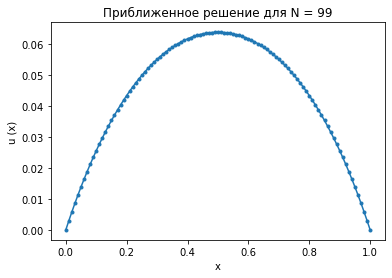

In [14]:
N = 99
x = np.linspace(0, 1, N + 2)  # N + 1 частей отрезка -> N + 2 точек разбиения
h = 1 / (N + 1)
u = gradient_descent(N, h, epsilon)

plt.plot(x, u, marker='.')
plt.xlabel('x')
plt.ylabel('u (x)')
plt.title(f'Приближенное решение для N = {N}')
plt.show()